<a href="https://colab.research.google.com/github/durdona0199/Untitled1/blob/main/instagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [12]:
df=pd.read_csv('/content/data (1).csv')

Dataning tahlil qilamiz, tozalik darajasini hususan

In [13]:
df

,rank,name,channel_Info,Category,Posts,Followers,Avg. Likes,Eng Rate
0,1,instagram,brand,photography,7.3K,580.1M,7.31K,0.1%
1,2,cristiano,male,"Health, Sports & Fitness",3.4K,519.9M,3.41K,1.4%
2,3,leomessi,male,"Health, Sports & Fitness",1K,403.7M,0.97K,1.7%
3,4,kyliejenner,female,entertainment,7K,375.9M,7.02K,1.7%
4,5,selenagomez,female,entertainment,1.8K,365.3M,1.85K,1.1%
...,...,...,...,...,...,...,...,...
195,196,fcbayern,male,"Health, Sports & Fitness",16.8K,35.4M,16.78K,0.6%
196,197,colesprouse,male,entertainment,1.1K,35.3M,1.14K,3.5%
197,198,shaymitchell,male,entertainment,6.3K,35.1M,6.31K,1.2%
198,199,ivetesangalo,female,entertainment,7.8K,35M,7.77K,0.4%


In [14]:
df.describe()

,rank
count,200.000000
mean,100.500000
std,57.879185
min,1.000000
25%,50.750000
50%,100.500000
75%,150.250000
max,200.000000


In [15]:
df.isnull().sum()

,0
rank,0
name,0
channel_Info,5
Category,7
Posts,0
Followers,0
Avg. Likes,0
Eng Rate,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rank          200 non-null    int64 
 1   name          200 non-null    object
 2   channel_Info  195 non-null    object
 3   Category      193 non-null    object
 4   Posts         200 non-null    object
 5   Followers     200 non-null    object
 6   Avg. Likes    200 non-null    object
 7   Eng Rate      200 non-null    object
dtypes: int64(1), object(7)
memory usage: 12.6+ KB


Tarkibida NaN qiymatlar bor bolgan columlarni tozalaymiz


In [17]:
df['channel_Info'].unique()

array(['brand', 'male', 'female', 'community', nan], dtype=object)

In [18]:
df[df['channel_Info'].isnull()]

,rank,name,channel_Info,Category,Posts,Followers,Avg. Likes,Eng Rate
104,105,michelleobama,NaN,Finance,691,51.9M,691,0.8%
118,119,jungkook.97,NaN,NaN,87,49.2M,87,15.2%
147,148,uarmyhope,NaN,fashion,171,42.2M,171,18.5%
158,159,agustd,NaN,NaN,83,41.2M,83,25.3%
177,178,tyga,NaN,entertainment,27,37.7M,27,1.7%


In [19]:
df.loc[df['name'] == 'jungkook.97', 'channel_Info'] = 'male'
df.loc[df['name'] == 'jungkook.97', 'Category'] = 'entertainment'

df.loc[df['name'] == 'michelleobama', 'channel_Info'] = 'male'

df.loc[df['name'] == 'uarmyhope', 'channel_Info'] = 'male'

df.loc[df['name'] == 'agustd', 'channel_Info'] = 'male'
df.loc[df['name'] == 'agustd', 'Category'] = 'entertainment'

df.loc[df['name'] == '', 'channel_Info'] = 'male'

In [20]:
df['Category'].unique()

array(['photography', 'Health, Sports & Fitness', 'entertainment', nan,
       'technology', 'fashion', 'News & Politics', 'Lifestyle',
       'Beauty & Makeup', 'Finance', 'food', 'Craft/DIY'], dtype=object)

In [21]:
df[df['Category'].isnull()]

,rank,name,channel_Info,Category,Posts,Followers,Avg. Likes,Eng Rate
14,15,virat.kohli,male,NaN,1.5K,228M,1.48K,1.2%
15,16,kendalljenner,male,NaN,731,223.4M,731,2.3%
19,20,kendalljenner,male,NaN,824,204.4M,824,2.5%
21,22,natgeo,male,NaN,26K,196.1M,26.02K,0.1%
150,151,jin,male,NaN,100,42.1M,100,23%


In [22]:
df.loc[df['name'] == 'virat.kohli', 'Category'] = 'Health, Sports & Fitness'

df.loc[df['name'] == 'kendalljenner', 'Category'] = 'entertainment'
df.loc[df['name'] == 'kendalljenner', 'channel_Info'] = 'female'

df.loc[df['name'] == 'kendalljenner', 'Category'] = 'entertainment'

df.loc[df['name'] == 'natgeo', 'Category'] = 'entertainment'

df.loc[df['name'] == 'jin', 'Category'] = 'entertainment'

M,K bilan belgilangan qiymatlarni (Str,obj) , son qiymatlarga otkazamiz


In [23]:
def convert_km(value):
    value = str(value).strip().upper().replace(',', '')
    if 'K' in value:
        return float(value.replace('K', '')) * 1_000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1_000_000
    else:
        return float(value)

df['Followers'] = df['Followers'].apply(convert_km)
df['Avg. Likes'] = df['Avg. Likes'].apply(convert_km)
df['Posts'] = df['Posts'].apply(convert_km)
df['Eng Rate'] = df['Eng Rate'].str.replace('%', '')
df['Eng Rate'] = df['Eng Rate'].astype(float)

Mutahasislik turlari asosida obunachilar soni boyicha group by

In [24]:
df.groupby("Category")['Followers'].mean().sort_values(ascending=False)

,Followers
Category,
photography,3.130500e+08
"Health, Sports & Fitness",9.165750e+07
entertainment,8.604593e+07
technology,6.110000e+07
Lifestyle,5.810000e+07
News & Politics,5.200000e+07
Finance,5.190000e+07
fashion,5.114000e+07
Beauty & Makeup,4.913333e+07


Channel info (sahifa yurutuvchi) bilan obunachilar faolik nisbati foizi group by

In [25]:
df.groupby("channel_Info")['Eng Rate'].mean()

,Eng Rate
channel_Info,
brand,0.180000
community,0.592308
female,2.484211
male,3.258947


like rate degan yangi column qoshamiz, malumotlar boglikdarajasini oshirish uchun

In [26]:
df['like_rate'] = df['Avg. Likes'] / df['Followers']


Ushbu kod orqali Followers va Eng Rate (Engagement Rate) o‘rtasidagi bog‘liqlikni vizual ravishda scatter plot (nuqtali grafika) shaklida ko‘rsatadi.

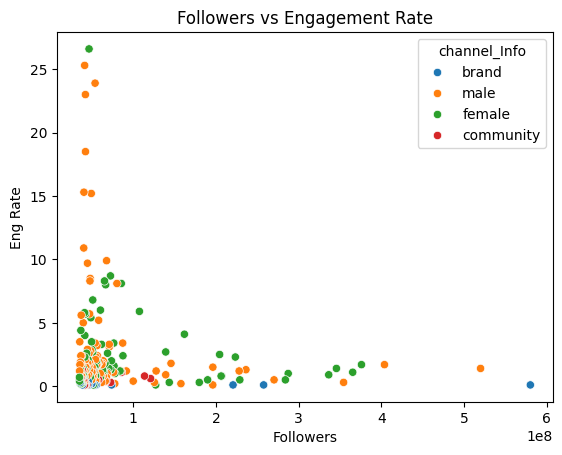

In [27]:
sns.scatterplot(data=df, x='Followers', y='Eng Rate', hue='channel_Info')
plt.title("Followers vs Engagement Rate")
plt.show()

Bu kod har bir Category (masalan: fashion, finance, entertainment) bo‘yicha Eng Rate (Engagement Rate) qiymatlarining taqsimotini boxplot (quti diagramma) orqali ko‘rsatadi.

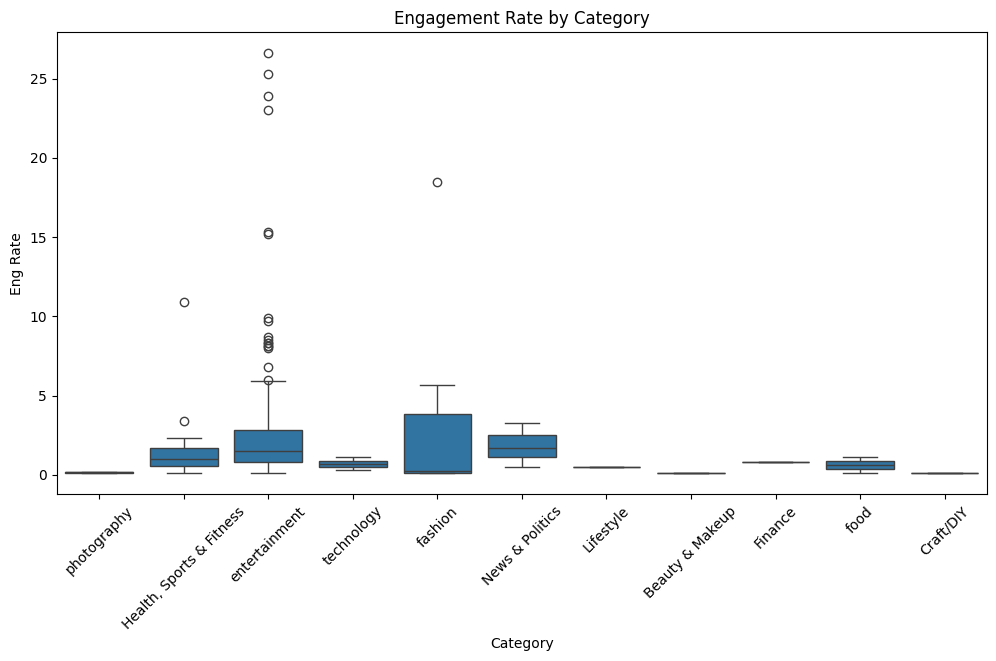

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Eng Rate')
plt.xticks(rotation=45)
plt.title("Engagement Rate by Category")
plt.show()

Bu kod channel_Info (ya’ni kanal turi yoki jins) bo‘yicha o‘rtacha Engagement Rate (Eng Rate) ni ustunli diagramma (barplot) orqali ko‘rsatadi.


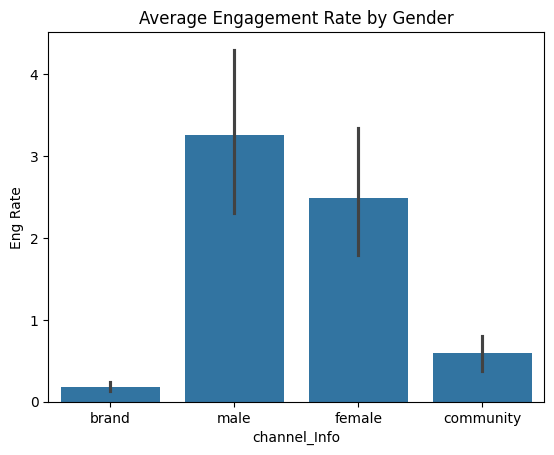

In [29]:
sns.barplot(data=df, x='channel_Info', y='Eng Rate')
plt.title("Average Engagement Rate by Gender")
plt.show()

df
 ichidagi raqamli ustunlar o‘rtasidagi o‘zaro bog‘liqlik (korrelyatsiya) ni hisoblab, issiqlik xaritasi (heatmap) orqali vizual tarzda ko‘rsatadi.

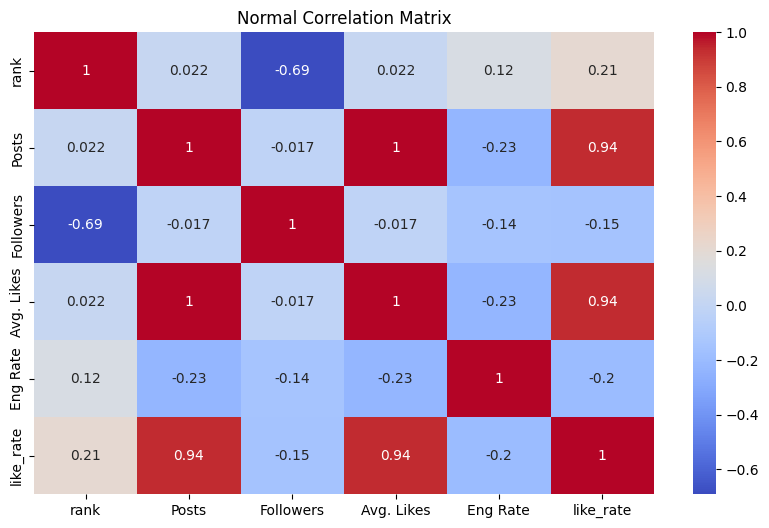

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_numeric = df.select_dtypes(include='number')
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Normal Correlation Matrix")
plt.show()


raqamli qiymatlarni standard scaler orqali normalizatsiya qilindi

In [31]:


df_num = df[['rank', 'Posts', 'Followers', 'Avg. Likes', 'like_rate']]
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_num)
df_scaled = pd.DataFrame(scaled_values, columns=df_num.columns)
mask = (abs(df_scaled) < 3).all(axis=1)
df_clean = df_num[mask]
df_scaled_clean = df_scaled[mask]


df
 ichidagi raqamli ustunlar o‘rtasidagi o‘zaro bog‘liqlik (korrelyatsiya) ni hisoblab, issiqlik xaritasi (heatmap) orqali vizual tarzda ko‘rsatadi [QAYTA]

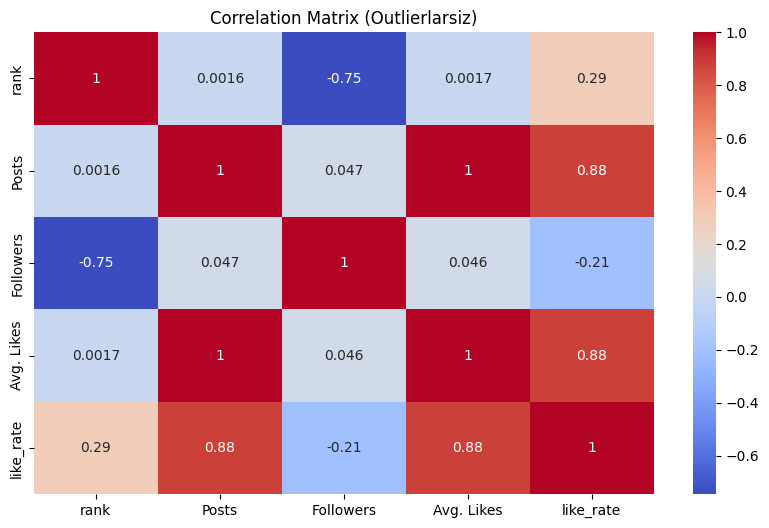

In [32]:
corr_clean = df_scaled_clean.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_clean, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Outlierlarsiz)")
plt.show()

In [33]:
df['Eng Rate'] = df['Eng Rate'].astype(str).str.replace('%', '').astype(float)
df['ER_label'] = (df['Eng Rate'] >= 1.0).astype(int)

print(df['ER_label'].value_counts())


ER_label
1    122
0     78
Name: count, dtype: int64


In [34]:
df['ER_label'] = (df['Eng Rate'] >= 1.0).astype(int)
df_encoded = pd.get_dummies(df[['channel_Info', 'Category']], drop_first=True)
X = pd.concat([df[['Posts', 'Followers', 'Avg. Likes']], df_encoded], axis=1)
y = df['ER_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_prediction = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_prediction)
print(f'RF accuracy: {rf_accuracy * 100:.2f}%')


RF accuracy: 83.33%


In [35]:
df['ER_label'] = (df['Eng Rate'] >= 1.0).astype(int)
print(df['ER_label'].value_counts())


ER_label
1    122
0     78
Name: count, dtype: int64


In [36]:
df_encoded = pd.get_dummies(df[['channel_Info', 'Category']], drop_first=True)
X = pd.concat([df[['Posts', 'Followers', 'Avg. Likes']], df_encoded], axis=1)
y = df['ER_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_prediction = rf_model.predict(X_test)
acc = accuracy_score(y_test, rf_prediction)
print(f"RF accuracy: {acc * 100:.2f}%")

RF accuracy: 83.33%


In [37]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_prediction = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_prediction)
print(f"DT accuracy: {dt_accuracy * 100:.2f}%")


DT accuracy: 76.67%


In [38]:
df.to_csv("instagramm_data.csv", index=False)

In [39]:
df['Category'].value_counts()

,count
Category,
entertainment,135
"Health, Sports & Fitness",40
fashion,10
Beauty & Makeup,3
News & Politics,3
photography,2
technology,2
food,2
Lifestyle,1


In [40]:
df_health = df[df['Category'] == 'Health, Sports & Fitness']
print(df_health)

     rank                  name channel_Info                  Category  \
1       2             cristiano         male  Health, Sports & Fitness   
2       3              leomessi         male  Health, Sports & Fitness   
11     12                  nike        brand  Health, Sports & Fitness   
14     15           virat.kohli         male  Health, Sports & Fitness   
20     21              neymarjr         male  Health, Sports & Fitness   
29     30             kingjames         male  Health, Sports & Fitness   
33     34            realmadrid    community  Health, Sports & Fitness   
34     35           fcbarcelona    community  Health, Sports & Fitness   
36     37       championsleague         male  Health, Sports & Fitness   
39     40              k.mbappe         male  Health, Sports & Fitness   
49     50          davidbeckham         male  Health, Sports & Fitness   
53     54                   nba    community  Health, Sports & Fitness   
60     61            ronaldinho       